# kaggle house prices

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
train = pd.read_csv('train.csv')

In [ ]:
train.iloc[:, 0:15].head()

In [ ]:
train.iloc[:, 15:30].head()

In [ ]:
train.iloc[:, 75:85].describe()

In [ ]:
#train.info()

In [ ]:
#train.dtypes

In [3]:
#retraitement des données :

train['LotFrontage'] = train['LotFrontage'].fillna(-1)

# NA mean No alley Access acording to data_description
train['Alley'] = train['Alley'].fillna('NoAlleyAccess')


train['MasVnrType'] = train['MasVnrType'].fillna('NoInfo')

train['MasVnrArea'] = train['MasVnrArea'].fillna(-1)

# NA mean No Basement
train['BsmtQual'] = train['BsmtQual'].fillna('NB')
train['BsmtCond'] = train['BsmtCond'].fillna('NB')
train['BsmtExposure'] = train['BsmtExposure'].fillna('NB')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('NB')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('NB')

# 1 missing value
train['Electrical'] = train['Electrical'].fillna('NoInfo')


# NA mean No Fireplace
train['FireplaceQu'] = train['FireplaceQu'].fillna('NF')

# NA mean No Garage
train['GarageType'] = train['GarageType'].fillna('NG')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(-1)
train['GarageFinish'] = train['GarageFinish'].fillna('NG')
train['GarageQual'] = train['GarageQual'].fillna('NG')
train['GarageCond'] = train['GarageCond'].fillna('NG')

# NA mean No pool, no fence, No misc feature
train['PoolQC'] = train['PoolQC'].fillna('NP')
train['Fence'] = train['Fence'].fillna('NF')
train['MiscFeature'] = train['MiscFeature'].fillna('NMF')


#[print(i, list(train)[i], np.unique(train.iloc[:,i])) for i in range(1,81)]

train.iloc[:, 0:32].sample(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond
649,650,180,RM,21.0,1936,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA
760,761,20,RL,70.0,9100,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA
750,751,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa
832,833,60,RL,44.0,9548,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,CompShg,VinylSd,VinylSd,BrkFace,223.0,Gd,TA,PConc,Gd,TA
513,514,20,RL,71.0,9187,Pave,NoAlleyAccess,Reg,Bnk,AllPub,...,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,TA,TA
1187,1188,20,RL,89.0,12461,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,CompShg,ImStucc,ImStucc,None,0.0,Gd,TA,PConc,Gd,TA
1173,1174,50,RL,138.0,18030,Pave,NoAlleyAccess,IR1,Bnk,AllPub,...,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA
341,342,20,RH,60.0,8400,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,CompShg,Wd Sdng,AsbShng,None,0.0,Fa,Fa,CBlock,TA,Fa
1174,1175,70,RL,80.0,16560,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA
1014,1015,20,RL,60.0,11664,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,CompShg,MetalSd,MetalSd,BrkFace,206.0,TA,TA,CBlock,TA,Fa


In [ ]:
train.info()

In [ ]:
#sns.jointplot(x='BsmtFinSF1',y='SalePrice',data=train)
#plt.show()

In [4]:
columns_to_encode = list(train.loc[:, train.dtypes == object])

for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    le.fit(train[column])
    train[column] = le.transform(train[column])
    #train = pd.get_dummies(train, columns=[column])

In [5]:
train = 


train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


Text(0.5,1,'Correlation')

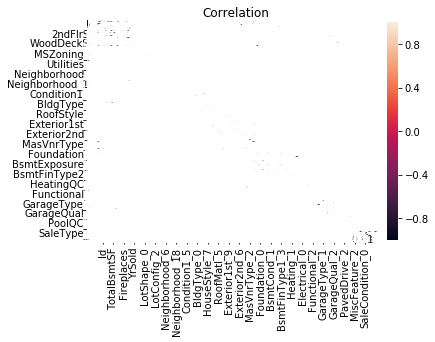

In [33]:
plt.figure()
sns.heatmap(train.corr(),annot=True)
plt.title('Correlation')


In [6]:
# this is our test set

y = train['SalePrice']
X = train.drop(['SalePrice', 'Id'], 1)


# flatten y into a 1-D array
y = np.ravel(y)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:

#Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))


predicted_regr = regr.predict(X_test)
print(regr.score(X_test, y_test))


0.944973332687365
0.5123026252315999


In [29]:
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predicted_regr))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted_regr))

Mean squared error: 3367964897.99
Variance score: 0.51


Feature ranking:
1. feature 0 (0.021217)
2. feature 16 (0.019773)
3. feature 13 (0.019523)
4. feature 11 (0.019384)
5. feature 35 (0.019057)
6. feature 3 (0.018980)
7. feature 12 (0.018880)
8. feature 27 (0.018826)
9. feature 2 (0.018219)
10. feature 7 (0.017993)
11. feature 36 (0.017873)
12. feature 6 (0.017679)
13. feature 9 (0.017256)
14. feature 25 (0.016862)
15. feature 23 (0.015935)
16. feature 29 (0.015565)
17. feature 28 (0.014760)
18. feature 4 (0.014152)
19. feature 14 (0.012488)
20. feature 21 (0.012021)
21. feature 8 (0.011859)
22. feature 5 (0.010414)
23. feature 1 (0.010081)
24. feature 17 (0.010011)
25. feature 61 (0.009801)
26. feature 50 (0.009555)
27. feature 47 (0.009506)
28. feature 26 (0.009252)
29. feature 199 (0.008978)
30. feature 24 (0.008750)
31. feature 20 (0.008505)
32. feature 206 (0.007881)
33. feature 168 (0.007835)
34. feature 259 (0.007760)
35. feature 57 (0.007715)
36. feature 114 (0.007569)
37. feature 166 (0.007469)
38. feature 220 (0.007465)
39. fea

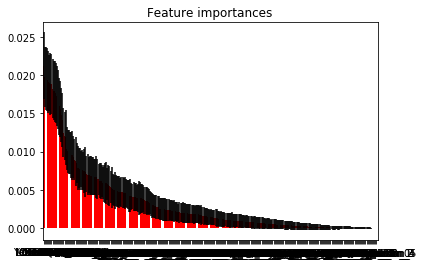

In [31]:
#Feature importances with forests of trees

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center", tick_label=X_train.columns)
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.show()